# 1. Material Balances in a Gas Permeation Unit

## 1.1 Operating Equation

Consider a binary gas phase mixture fed into a perfectly mixed membrane separation unit with molar flow rate $F_{in}$, and composition $\vec{z}$. The retentate stream is characterised by molar flow rate $F_{r}$, and composition $\vec{x}$, while  permeate is characterised by molar flow rate $F_{p}$  and composition $\vec{y}$.

Since we are dealing with a binary mixture, in all streams the compositions of A and B complement to 1 (e.g. for the permeate stream $y_B=1-y_A$). Hence we drop unnecessary subscripts and indicate with $z$, $x$, and $y$ the molar fraction of component A in the mixture.   

The global material balance on the unit reads: $F_{in}=F_p+F_r$

The material balance for component A reads: $F_{in}z=F_py+F_rx$ 

Combining these two equations: 

$$
F_{in}z=F_py+(F_{in}-F_p)x
$$
$$
z=\frac{F_p}{F_{in}}y+(1-\frac{F_p}{F_{in}})x
$$(GPeq1)

the quantity $\frac{F_p}{F_{in}}$ is commonly defined as cut and indicated as $\theta$. 

Solving Eq.{eq}`GPeq1` for $y$ leads to the expression: 

$$
y=\frac{\left(\theta-1\right)}{\theta}x+\frac{1}{\theta}z
$$(GPeq:Operating)


Eq. {eq}`GPeq:Operating` is typically referred to as the Operating Equation of a perfectly mixed gas phase membrane module. 

#### Graphical Representation

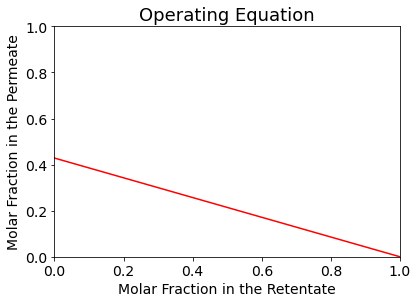

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Parameters: 
# cut
theta = 0.7
# molar fraction in the feed
z = 0.3
N = 100 #number of points
x_op = np.linspace(0, 1, N)

#Operating Equation
y_op = ((theta - 1) / theta) * x_op + (z / theta) 

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(x_op,y_op, marker=' ' , color='r')
axes.set_xlim([0,1])
axes.set_ylim([0,1]);
plt.title('Operating Equation', fontsize=18);
axes.set_xlabel('Molar Fraction in the Retentate', fontsize=14);
axes.set_ylabel('Molar Fraction in the Permeate',fontsize=14);



## 1.2 Rate Transfer Equation

Let us begin by considering that the permeate flow rate of component A is given by its molar flux through the membrane multiplied by the membrane total area: 

$$
F_py=J\rho_AA_M
$$(GPeq2)

where $J$ is the volumetric flux across the membrane, $\rho_A$ is the molar density of component A, and $A_M$ is the total area of the membrane. Applying the solution/diffusion model to define the volumetric flux Eq. {eq}`GPeq2` becomes:

$$
F_py=\frac{P_A}{l}\rho_AA\left(xp_r-yp_p\right)
$$(GPeq3)

where $P_A$ is the permeability of the membrane to component $A$, $l$ is the thickness of the membrane, $p_r$ is the pressure on the retentate side, $p_p$ is the pressure on the permeate side. 

The same expression can be written for component $B$: 

$$
F_p(1-y)=\frac{P_B}{l}\rho_BA\left((1-x)p_r-(1-y)p_p\right)
$$(GPeq4)

Both Eq. {eq}`GPeq3` and {eq}`GPeq4` can be solved for $F_p$ and equated, leading to: 

$$
\frac{P_A}{y}\rho_A\left(xp_r-yp_p\right)=\frac{P_B}{(1-y)}\rho_B\left((1-x)p_r-(1-y)p_p\right)
$$(GPeq5) 

Eq. {eq}`GPeq5` can be solved either for $y$ or for $x$, the latter being simpler. After some algebraic manipulation the solution for $x$ is: 

$$
x=\frac{y\left[1+\frac{p_p}{p_r}(1-y)\left(\alpha_{AB}\frac{\rho_A}{\rho_B}-1\right)\right]}{\alpha_{AB}\frac{\rho_A}{\rho_B}-\left(\alpha_{AB}\frac{\rho_A}{\rho_B}-1\right)y}
$$(GPeq6) 

where $\alpha_{A,B}=\frac{P_A}{P_B}$ is the ideal separation factor.

Eq. {eq}`GPeq6` can be simplified when the gas phase can be considered ideal. In such case $\rho_A=\rho_B=P/RT$, yielding: 

$$
x=\frac{y\left[1+\frac{p_p}{p_r}(1-y)\left(\alpha_{AB}-1\right)\right]}{\alpha_{AB}-\left(\alpha_{AB}-1\right)y}
$$(GPeq7)

Eq. {eq}`GPeq7` is called _rate transfer equation_ and together with th operating equation identify the membrane operating conditions in composition space. 

#### Graphical Representation

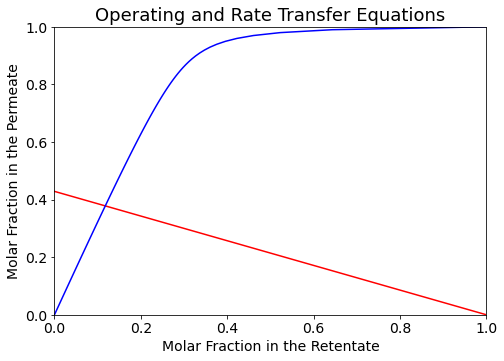

In [2]:
# Parameters: 
# Ratio between the permeate and retentate side pressures
Pp_Pr = 0.3
# ideal separation factor
alpha = 100
N = 100 #number of points
y_rt = np.linspace(0, 1, N)

#Rate Transfer
x_rt = y_rt * (1 + Pp_Pr * (1-y_rt) * (alpha - 1)) / (alpha - (alpha - 1) * y_rt)

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.0,1.0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(x_op,y_op, marker=' ' , color='r')
axes.plot(x_rt,y_rt, marker=' ' , color='b')
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title('Operating and Rate Transfer Equations', fontsize=18);
axes.set_xlabel('Molar Fraction in the Retentate', fontsize=14);
axes.set_ylabel('Molar Fraction in the Permeate',fontsize=14);


The operating conditions correspond to the interasection of the RT and OP equations, i.e. the solution of a system of equations defined by the operating and rate transfer equations. 

#### Numerical Solution

Operating point -> x =  0.11767288696786887  y =  0.3781401912994848


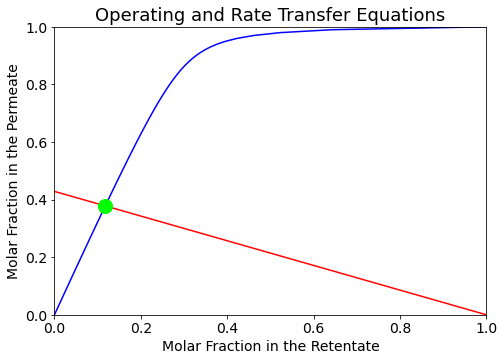

In [3]:
from scipy.optimize import fsolve

def equations(vars):
    x, y = vars
    eq1 = ((theta - 1) / theta) * x + (z / theta) - y
    eq2 = y * (1 + Pp_Pr * (1-y) * (alpha - 1)) / (alpha - (alpha - 1) * y) - x
    return [eq1, eq2]

x_set, y_set =  fsolve(equations, (1, 1))


#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.0,1.0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(x_op,y_op, marker=' ' , color='r')
axes.plot(x_rt,y_rt, marker=' ' , color='b')
axes.plot(x_set,y_set, marker='o' , color='lime', markersize=14)
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title('Operating and Rate Transfer Equations', fontsize=18);
axes.set_xlabel('Molar Fraction in the Retentate', fontsize=14);
axes.set_ylabel('Molar Fraction in the Permeate',fontsize=14);


print("Operating point -> x = ", x_set, " y = ", y_set) 



## Contributions

Radoslav Lukanov, 16 Feb 2021